Import libraries


In [ ]:
import torch
import torch.nn as nn
import torchvision.utils as vutils
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


 Generator


In [ ]:
class Generator(nn.Module):
    def __init__(self, noise_dim, num_classes, img_channels):
        super(Generator, self).__init__()
        self.label_embedding = nn.Embedding(num_classes, noise_dim)
        self.model = nn.Sequential(
            nn.Linear(noise_dim * 2, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(True),
            nn.Linear(512, img_channels * 64 * 64),
            nn.Tanh()
        )
def forward(self, noise, labels):
        label_embeddings = self.label_embedding(labels)
        input = torch.cat([noise, label_embeddings], dim=-1)
        img = self.model(input).view(-1, 3, 64, 64)  # Assuming 3 channels (RGB)
        return img

Discriminator

In [ ]:
class Generator(nn.Module):
    def __init__(self, noise_dim, num_classes, img_channels):
        super(Generator, self).__init__()
        self.label_embedding = nn.Embedding(num_classes, noise_dim)
        self.model = nn.Sequential(
            nn.Linear(noise_dim * 2, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(True),
            nn.Linear(512, img_channels * 64 * 64),
            nn.Tanh()
        )
    # The forward method should be indented at this level
    def forward(self, noise, labels):
        label_embeddings = self.label_embedding(labels)
        input = torch.cat([noise, label_embeddings], dim=-1)
        img = self.model(input).view(-1, 3, 64, 64)  # Assuming 3 channels (RGB)
        return img

Hyperparameters and Initialization

In [ ]:
import torch
import torch.nn as nn
import torchvision.utils as vutils
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# ... (other code) ...

# Define the Discriminator class
class Discriminator(nn.Module):
    def __init__(self, num_classes, img_channels):
        super(Discriminator, self).__init__()
        self.label_embedding = nn.Embedding(num_classes, img_channels * 64 * 64)
        self.model = nn.Sequential(
            nn.Linear(img_channels * 64 * 64 + num_classes, 512),  # Input size + label embedding size
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        img_flat = img.view(img.size(0), -1)  # Flatten the image
        # Concatenate image and label embeddings
        input_data = torch.cat([img_flat, self.label_embedding(labels)], dim=1)
        validity = self.model(input_data)
        return validity

# ... (rest of your code) ...

noise_dim = 100
num_classes = 10
img_channels = 3

generator = Generator(noise_dim, num_classes, img_channels).to(device)
discriminator = Discriminator(num_classes, img_channels).to(device)  # Now Discriminator is defined

adversarial_loss = nn.BCELoss()
optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

load dataset

In [ ]:
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])


dataset = datasets.ImageFolder('/content/drive/MyDrive/sidddh/CGAN/PartB_DFU_Dataset/FakeData', transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)


training

In [ ]:
for epoch in range(num_epochs):
    for i, (real_imgs, labels) in enumerate(dataloader):
        real_imgs, labels = real_imgs.to(device), labels.to(device)

        # Train Discriminator
        optimizer_D.zero_grad()

        # Real images
        real_validity = discriminator(real_imgs, labels)
        real_targets = torch.full((real_imgs.size(0), 1), real_label, device=device, dtype=torch.float)  # Set dtype to float
        real_loss = adversarial_loss(real_validity, real_targets)

        # Fake images
        noise = torch.randn(real_imgs.size(0), noise_dim, device=device)
        fake_imgs = generator(noise, labels)
        fake_validity = discriminator(fake_imgs.detach(), labels)
        fake_targets = torch.full((real_imgs.size(0), 1), fake_label, device=device, dtype=torch.float)  # Set dtype to float
        fake_loss = adversarial_loss(fake_validity, fake_targets)

        # Combine real and fake loss
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()

        gen_validity = discriminator(fake_imgs, labels)
        gen_targets = torch.full((real_imgs.size(0), 1), real_label, device=device, dtype=torch.float)  # Set dtype to float
        g_loss = adversarial_loss(gen_validity, gen_targets)

        g_loss.backward()
        optimizer_G.step()

        # Print progress
        if i % 50 == 0:
            print(f"[Epoch {epoch}/{num_epochs}] [Batch {i}/{len(dataloader)}] [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")

    # Save example generated images
    if epoch % 10 == 0:
        with torch.no_grad():
            sample_noise = torch.randn(16, noise_dim, device=device)
            sample_labels = torch.randint(0, num_classes, (16,), device=device)
            generated_imgs = generator(sample_noise, sample_labels)
            vutils.save_image(generated_imgs, f"generated_epoch_{epoch}.png", normalize=True)


[Epoch 0/50] [Batch 0/16] [D loss: 0.6940790414810181] [G loss: 0.8698920011520386]
[Epoch 1/50] [Batch 0/16] [D loss: 0.7320727109909058] [G loss: 1.056553840637207]
[Epoch 2/50] [Batch 0/16] [D loss: 0.87367844581604] [G loss: 1.9174129962921143]
[Epoch 3/50] [Batch 0/16] [D loss: 0.5662018060684204] [G loss: 2.883500337600708]
[Epoch 4/50] [Batch 0/16] [D loss: 0.6126940250396729] [G loss: 1.7654340267181396]
[Epoch 5/50] [Batch 0/16] [D loss: 0.7007176280021667] [G loss: 1.381746768951416]
[Epoch 6/50] [Batch 0/16] [D loss: 0.7447328567504883] [G loss: 0.7285619974136353]
[Epoch 7/50] [Batch 0/16] [D loss: 0.7238690853118896] [G loss: 0.6706466674804688]
[Epoch 8/50] [Batch 0/16] [D loss: 0.6807818412780762] [G loss: 0.790224015712738]
[Epoch 9/50] [Batch 0/16] [D loss: 0.6727173924446106] [G loss: 0.7469825744628906]
[Epoch 10/50] [Batch 0/16] [D loss: 0.7021422386169434] [G loss: 0.7573065161705017]
[Epoch 11/50] [Batch 0/16] [D loss: 0.7201497554779053] [G loss: 0.75452029705047

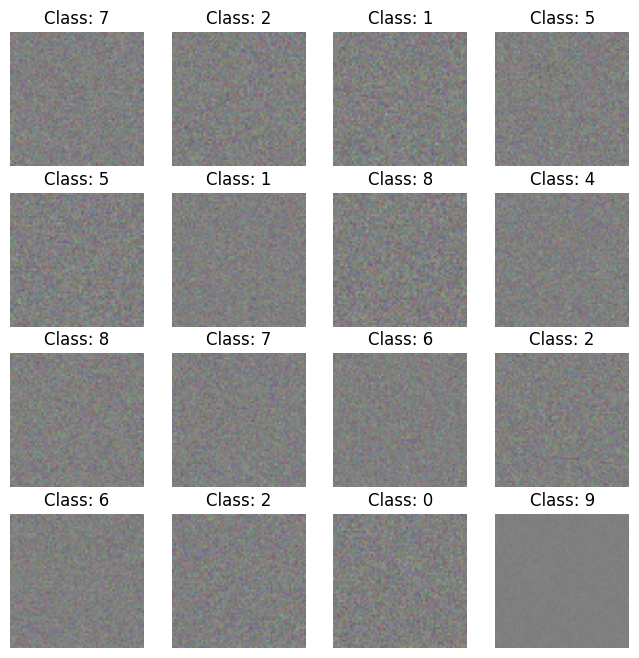

In [ ]:
def generate_samples(generator, num_samples, noise_dim, num_classes, device):
    generator.eval()
    with torch.no_grad():
        noise = torch.randn(num_samples, noise_dim, device=device)
        labels = torch.randint(0, num_classes, (num_samples,), device=device)
        generated_imgs = generator(noise, labels)
        return generated_imgs, labels

num_samples = 16
generated_imgs, labels = generate_samples(generator, num_samples, noise_dim, num_classes, device)

# Display generated images
plt.figure(figsize=(8, 8))
for i in range(num_samples):
    plt.subplot(4, 4, i+1)
    plt.imshow((generated_imgs[i].cpu().permute(1, 2, 0).numpy() + 1) / 2)  # Rescale to [0, 1]
    plt.title(f"Class: {labels[i].item()}")
    plt.axis("off")
plt.show()